# Capstone EDA
## Questions:
* What does generation look like over time?
* What types of generation/fuel type are growing/shrinking?
* When did these changes occur?

In [3]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [4]:
#bring in data
df1 = pd.read_csv('seds_all_states_long.csv')
#sort on state
df1 = df1.sort_values(['state'])
#drop 0 columns because this dataframe will be used as the master for total generation, so zeros will get summed out
#group by year and state, so we can see everything in chronological order
df1 = df1[df1.value != 0].groupby(['year','state']).sum()
df1.index.names = ['year','state']
df1.columns = ['sumgen']

#make some copies that we can play around with and graph for meaning
copy1 = df1.copy()
copy2 = df1.copy()




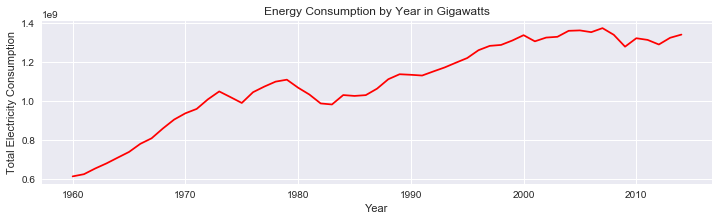

In [5]:
yearly_cons = df1.reset_index()
yearly_cons.head()
yearly_cons=yearly_cons.groupby('year').sum()

fig, axes = plt.subplots(figsize = (12,3))

axes.plot(yearly_cons, 'r')
axes.set_xlabel('Year')
axes.set_ylabel('Total Electricity Consumption')
axes.set_title('Energy Consumption by Year in Gigawatts');
plt.show()


In [6]:
#Get yearly consumption by state, and pair that with total consumption for the year
yearly_cons = yearly_cons.reset_index()
copy2 = copy2.reset_index()

percentage_copy = copy2.merge(yearly_cons, how = 'outer', on = ['year'])


In [7]:
#make a new row that shows what percent of generation the given state was during every year
percentage_copy['Percent of Yearly Consumption'] = 100*percentage_copy['sumgen_x']/percentage_copy['sumgen_y']

In [8]:
#Unsurprisingly California, Texas, New York, and Pennsylvania use a lot of energy

In [9]:
sorted_states = percentage_copy.sort_values(['year','Percent of Yearly Consumption','year'])

In [10]:
#break up generation by state and by year. This will allow us to make area graphs showing not
#only the change in consumption over time, but which states grew and and at what rate.
tot_gen_by_st = df1.unstack('state')

tot_gen_by_st.columns= tot_gen_by_st.columns.droplevel(0)





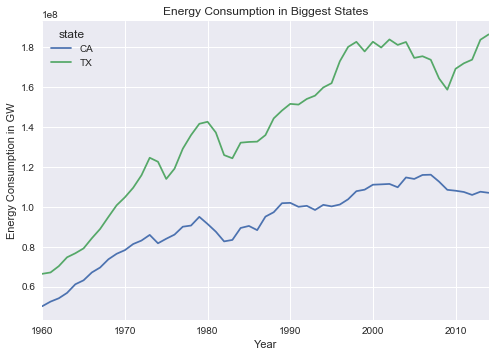

In [11]:
states = tot_gen_by_st
states.plot(y = ['CA','TX'])
plt.xlabel('Year')
plt.ylabel('Energy Consumption in GW')
plt.title('Energy Consumption in Biggest States')
plt.show()

## The first dataframe makes it easy to see how states contribute to the mix over a longer time frame, but the second one will give us a nice breakdown of generation type/fuel type, which is more what we're interested in. Eventually I'll go back in Bokeh or something and make it more interactive.

In [12]:
df2 = pd.read_excel('annual_generation_state.xls', skiprows = 1)


In [14]:
df2.columns = ['year','state','type','input_type','gen_by_type']
df2.head()

,year,state,type,input_type,gen_by_type
0,1990,AK,Total Electric Power Industry,Total,5599506.0
1,1990,AK,Total Electric Power Industry,Coal,510573.0
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521.0
3,1990,AK,Total Electric Power Industry,Natural Gas,3466261.0
4,1990,AK,Total Electric Power Industry,Petroleum,497116.0


In [29]:
totals_type = df2.groupby(['year','type']).sum()
totals_type.unstack('type')



gen_by_type  \
type Combined Heat and Power, Commercial Power   
year                                             
1990                               23348486.00   
1991                               22636104.00   
1992                               24912544.00   
1993                               28001676.00   
1994                               30477314.00   
1995                               32928810.00   
1996                               36118874.00   
1997                               34802174.00   
1998                               34992344.00   
1999                               34252222.00   
2000                               31611092.00   
2001                               29663780.00   
2002                               29658044.00   
2003                               29984706.00   
2004                               33078747.00   
2005                               33966659.00   
2006                               33483648.00   
2007                               33093578.00   
2008                               31702608.00   
2009                               32658086.00   
2010                               34366392.00   
2011                               40320001.52   
2012                               45203016.00   
2013                               48934678.78   
2014                               50078313.69   
2015                               50380787.00   

                                              \
type Combined Heat and Power, Electric Power   
year                                           
1990                            2.451018e+08   
1991                            2.877670e+08   
1992                            3.652756e+08   
1993                            4.319056e+08   
1994                            4.939986e+08   
1995                            5.659181e+08   
1996                            5.862678e+08   
1997                            5.924429e+08   
1998                            6.151601e+08   
1999                            6.216172e+08   
2000                            6.584229e+08   
2001                            6.780618e+08   
2002                            7.746786e+08   
2003                            7.826948e+08   
2004                            7.370366e+08   
2005                            7.214998e+08   
2006                            6.614379e+08   
2007                            7.094259e+08   
2008                            6.676580e+08   
2009                            6.365831e+08   
2010                            6.481684e+08   
2011                            6.241277e+08   
2012                            6.567775e+08   
2013                            5.904745e+08   
2014                            6.008216e+08   
2015                            6.206902e+08   

                                                \
type Combined Heat and Power, Industrial Power   
year                                             
1990                              5.226744e+08   
1991                              5.303168e+08   
1992                              5.731219e+08   
1993                              5.851755e+08   
1994                              6.047109e+08   
1995                              6.040999e+08   
1996                              6.040662e+08   
1997                              6.163864e+08   
1998                              6.165271e+08   
1999                              6.250572e+08   
2000                              6.266932e+08   
2001                              5.966987e+08   
2002                              6.103191e+08   
2003                              6.181190e+08   
2004                              6.157007e+08   
2005                              5.789568e+08   
2006                              5.930171e+08   
2007                              5.725123e+08   
2008                              5.484527e+08   
2009                              5.293164e+08   
2010                              5.76329

In [37]:
totals_type.columns = totals_type.columns.droplevel(0)


AttributeError: 'Index' object has no attribute 'droplevel'

In [36]:
totals_type.plot(y=totals_type['gen_by_type'])

KeyError: '[  2.33484860e+07   2.45101798e+08   5.22674386e+08   1.12326040e+10\n   1.27580642e+08   1.21513093e+10   2.26361040e+07   2.87767024e+08\n   5.30316764e+08   1.13000915e+10   1.54384202e+08   1.22951956e+10\n   2.49125440e+07   3.65275648e+08   5.73121884e+08   1.11888766e+10\n   1.83342160e+08   1.23355288e+10   2.80016760e+07   4.31905600e+08\n   5.85175490e+08   1.15300991e+10   2.13582554e+08   1.27887644e+10\n   3.04773140e+07   4.93998632e+08   6.04710938e+08   1.16428483e+10\n   2.18054370e+08   1.29900896e+10   3.29288100e+07   5.65918052e+08\n   6.04099896e+08   1.19781144e+10   2.32888292e+08   1.34139494e+10\n   3.61188740e+07   5.86267792e+08   6.04066242e+08   1.23097686e+10\n   2.40529012e+08   1.37767505e+10   3.48021740e+07   5.92442934e+08\n   6.16386426e+08   1.24900926e+10   2.34965022e+08   1.39686891e+10\n   3.49923440e+07   6.15160080e+08   6.16527070e+08   1.28486832e+10\n   3.65819326e+08   1.44811820e+10   3.42522220e+07   6.21617156e+08\n   6.25057176e+08   1.26946942e+10   8.03618522e+08   1.47792393e+10\n   3.16110920e+07   6.58422876e+08   6.26693158e+08   1.20615335e+10\n   1.83015954e+09   1.52084202e+10   2.96637800e+07   6.78061813e+08\n   5.96698696e+08   1.05197827e+10   3.12236763e+09   1.49465746e+10\n   2.96580440e+07   7.74678561e+08   6.10319134e+08   1.01978287e+10\n   3.82132458e+09   1.54338090e+10   2.99847060e+07   7.82694837e+08\n   6.18119005e+08   9.84912246e+09   4.25281982e+09   1.55327408e+10\n   3.30787470e+07   7.37036644e+08   6.15700719e+08   1.00209246e+10\n   4.47548033e+09   1.58822211e+10   3.39666590e+07   7.21499815e+08\n   5.78956777e+08   9.89938223e+09   4.98788553e+09   1.62216910e+10\n   3.34836480e+07   6.61437942e+08   5.93017086e+08   9.93462219e+09\n   5.03624805e+09   1.62588089e+10   3.30935780e+07   7.09425923e+08\n   5.72512328e+08   1.00165236e+10   5.29542348e+09   1.66269789e+10\n   3.17026080e+07   6.67658022e+08   5.48452688e+08   9.90146679e+09\n   5.32827094e+09   1.64775510e+10   3.26580860e+07   6.36583112e+08\n   5.29316435e+08   9.49110399e+09   5.11166209e+09   1.58013237e+10\n   3.43663920e+07   6.48168431e+08   5.76329049e+08   9.88652842e+09\n   5.35484730e+09   1.65002396e+10   4.03200015e+07   6.24127657e+08\n   5.67498868e+08   9.84340400e+09   5.32521318e+09   1.64005637e+10\n   4.52030160e+07   6.56777525e+08   5.84426441e+08   9.35668955e+09\n   5.54796454e+09   1.61910611e+10   4.89346788e+07   5.90474476e+08\n   6.00060291e+08   9.55223364e+09   5.47215319e+09   1.62638563e+10\n   5.00783137e+07   6.00821600e+08   5.76332619e+08   9.52989398e+09\n   5.61729751e+09   1.63744240e+10   5.03807870e+07   6.20690201e+08\n   5.82848121e+08   9.26129038e+09   5.79519427e+09   1.63104038e+10] not in index'

In [38]:
df_totals_input = df2.groupby(['year','input_type']).sum()

In [39]:
df_totals_input.head()


gen_by_type
year input_type                              
1990 Coal                        6.376046e+09
     Geothermal                  6.173708e+07
     Hydroelectric Conventional  1.171463e+09
     Natural Gas                 1.491061e+09
     Nuclear                     2.307447e+09

In [ ]:
df2.columns

In [ ]:
df2_yr_tot = df2[df2.state == 'US-Total']

In [ ]:
df2_yr_tot.head()
